# Machine Learning Basics with Scikit-learn: Day 5
In our last session, we will build a model to predict the chronic kidney disease. The data was taken over a 2-month period in India with 25 features ( eg, red blood cell count, white blood cell count, etc). The target is the 'classification', which is either 'ckd' or 'notckd' - ckd=chronic kidney disease. We will use machine learning techniques to predict if a patient is suffering from a chronic kidney disease or not. This dataset has misssing data, features in different scales, and 25 features. For more information click [here](https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease). 

We will perform the following actions:
1. Import the dataset
2. Analyze the dataset
3. Imput missing values
4. Scale the data
5. Create training and testing datasets
6. Train a neural network with the training dataset
7. Evaluate the model with the testing dataset

Let's start loading the functions and libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
#from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer

# 1. Import the dataset

We import the dataset. This time, we will use a CSV file which contains the required data.

In [4]:
kidney_df = pd.read_csv("https://raw.githubusercontent.com/dgzara/nuit_machine_learning_workshop/main/kidney_disease.csv", index_col=0)
kidney_df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd


The target column was coded using strings (`notckd` and `ckd`). We can replace them with binary values (0 and 1).  

In [5]:
kidney_df['classification'] = kidney_df['classification'].str.replace('notckd', '0')
kidney_df['classification'] = kidney_df['classification'].str.replace('ckd', '1')

In [6]:
kidney_df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,1
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,1
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,0
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,0
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,0


We split the dataset into `X` and `y` variables

In [7]:
X = kidney_df.drop(['classification'], axis=1)
y = kidney_df['classification'].astype(int)

In [11]:
kidney_df.shape

(400, 25)

In [12]:
kidney_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

## 2. Analyze the dataset

According to the dataset's documentation, the features available are:
1. age - age
2. bp - blood pressure
3. sg - specific gravity
4. al - albumin
5. su - sugar
6. rbc - red blood cells
7. pc - pus cell
8. pcc - pus cell clumps
9. ba - bacteria
10. bgr - blood glucose random
11. bu - blood urea
12. sc - serum creatinine
13. sod - sodium
14. pot - potassium
15. hemo - hemoglobin
16. pcv - packed cell volume
17. wc - white blood cell count
18. rc - red blood cell count
19. htn - hypertension
20. dm - diabetes mellitus
21. cad - coronary artery disease
22. appet - appetite
23. pe - pedal edema
24. ane - anemia

We check the columns:

In [8]:
X.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane'],
      dtype='object')

Are the columns numeric or categorical?

In [9]:
X.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv       object
wc        object
rc        object
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
dtype: object

In [10]:
# How much data is missing? 
X.isna().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       70
wc       105
rc       130
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
dtype: int64

In [14]:
# What are the main descriptive statistics of this dataset?
X.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


The first finding is that some columns have many missing observations. For example, potassium (`pot`) has 88 missing values. 

How is the numeric data distributed?

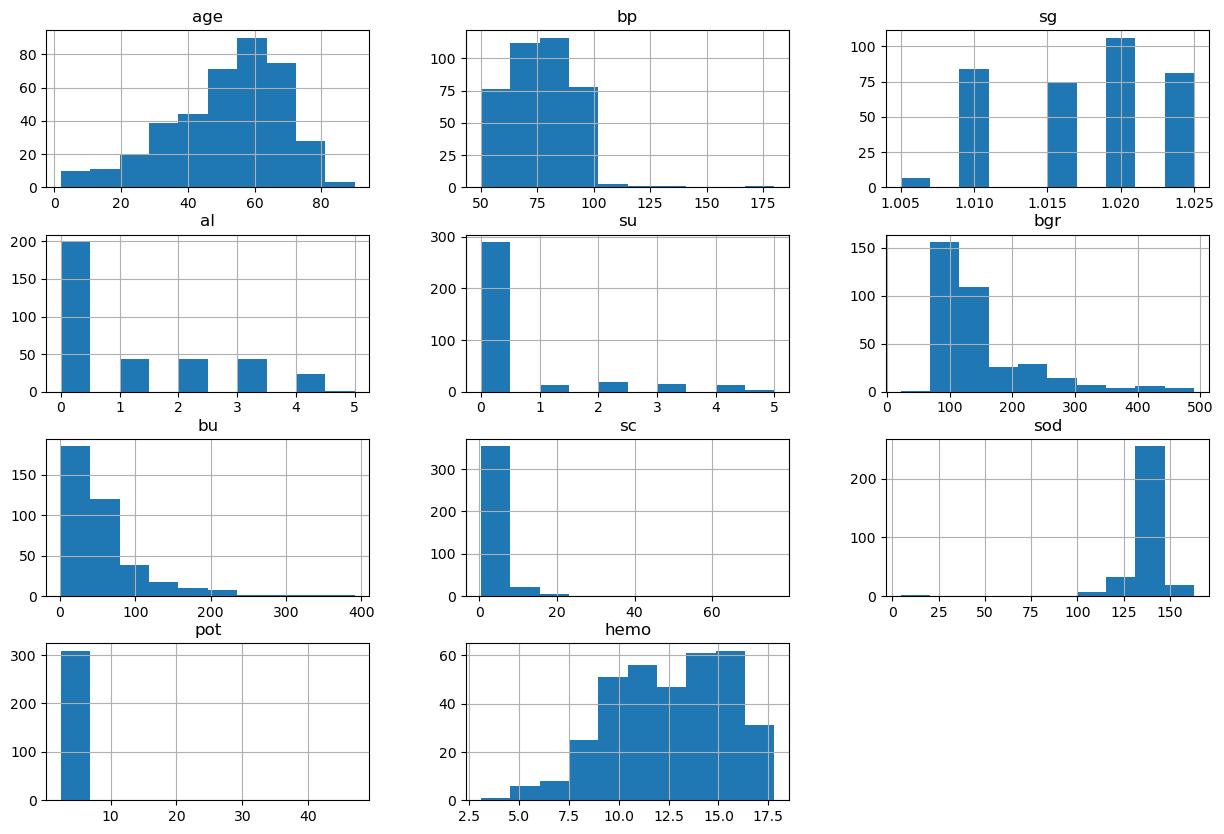

In [15]:
X.hist(figsize=(15,10))
plt.show()

We are going to select the numeric columns and categorical columns separately for our transformations

In [45]:
numeric_columns = X.select_dtypes(include=np.number).columns.tolist()
numeric_columns

['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']

In [46]:
categorical_columns = list(set(X.columns) - set(numeric_columns))
categorical_columns

['ba',
 'htn',
 'appet',
 'pc',
 'pe',
 'ane',
 'rc',
 'pcv',
 'pcc',
 'rbc',
 'wc',
 'dm',
 'cad']

## 3. Imput missing values

We will use the `SimpleImputer` class, which provides basic strategies for imputing missing values. Missing values can be imputed with a provided constant value, or using the statistics (mean, median or most frequent) of each column in which the missing values are located. This class also allows for different missing values encodings.
* For numeric attributes, we can use `mean` to replace `NaN` values.
* For categorical attributes, we can use `most_frequent` to replace `NaN` values.

Let's start imputing the missing numerical data

In [47]:
# We will copy the X dataframe to X_imp and keep the original dataframe X separated
X_imp = X.copy()

In [48]:
# Create the SimpleImputer object
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [49]:
# Use the imputer to fit and transform the numeric data. Replace the 
X_imp[numeric_columns] = imp.fit_transform(X_imp[numeric_columns])

In [50]:
X_imp[numeric_columns]

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
id,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,15.4
1,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,11.3
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,4.627244,9.6
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,11.6
...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.000000,49.0,0.5,150.000000,4.900000,15.7
396,42.0,70.0,1.025,0.0,0.0,75.000000,31.0,1.2,141.000000,3.500000,16.5
397,12.0,80.0,1.020,0.0,0.0,100.000000,26.0,0.6,137.000000,4.400000,15.8


In [51]:
# Check how many missing values each feature has. 
X_imp.isna().sum()

age        0
bp         0
sg         0
al         0
su         0
rbc      152
pc        65
pcc        4
ba         4
bgr        0
bu         0
sc         0
sod        0
pot        0
hemo       0
pcv       70
wc       105
rc       130
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
dtype: int64

### Exercise
Create an `SimpleImputer` object and impute the missing categorical data. Use `most_frequent` as the strategy. Do not forget to use `X_imp` for this operation:

In [52]:
# Create the imputer using `most_frequent` strategy
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [53]:
# Impute the missing categorical values of X_imp
X_imp[categorical_columns] = imp.fit_transform(X_imp[categorical_columns])

In [54]:
# Check the results
X_imp[categorical_columns]

,ba,htn,appet,pc,pe,ane,rc,pcv,pcc,rbc,wc,dm,cad
id,,,,,,,,,,,,,
0,notpresent,yes,good,normal,no,no,5.2,44,notpresent,normal,7800,yes,no
1,notpresent,no,good,normal,no,no,5.2,38,notpresent,normal,6000,no,no
2,notpresent,no,poor,normal,no,yes,5.2,31,notpresent,normal,7500,yes,no
3,notpresent,yes,poor,abnormal,yes,yes,3.9,32,present,normal,6700,no,no
4,notpresent,no,good,normal,no,no,4.6,35,notpresent,normal,7300,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,notpresent,no,good,normal,no,no,4.9,47,notpresent,normal,6700,no,no
396,notpresent,no,good,normal,no,no,6.2,54,notpresent,normal,7800,no,no
397,notpresent,no,good,normal,no,no,5.4,49,notpresent,normal,6600,no,no


In [55]:
# Check how many missing values each feature has. All values should be zero now. 
X_imp.isna().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wc       0
rc       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
dtype: int64

## 4. Scale the data
Yesterday we discussed the importance of scaling numeric data to (a) handle outliers and (b) compare the effect of increasing one unit of each feature on the dependent variable. We will standarize the numeric features present in this dataset.

In [56]:
# We copy the imputed data to a new dataframe.
X_scaled = X_imp.copy()

### Exercise
Create the scaler using `preprocessing.StandardScaler()` and then replace the numeric columns of `X_scaled` with the scaler.

In [57]:
min_max_scaler = preprocessing.MinMaxScaler()

In [58]:
# We create the scaler using preprocessing.StandardScaler() function
scaler = preprocessing.MinMaxScaler()

In [59]:
# We use the scaler to fit and transform only the numeric features (`X_imp[numeric_columns]`)
X_scaled[numeric_columns] = min_max_scaler.fit_transform(X_imp[numeric_columns])

In [60]:
# We print the descriptive statistics
round(X_scaled.describe(),2)

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00
mean,0.56,0.20,0.62,0.20,0.09,0.27,0.14,0.04,0.84,0.05,0.64
std,0.19,0.10,0.27,0.25,0.21,0.16,0.13,0.07,0.06,0.06,0.18
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.45,0.15,0.50,0.00,0.00,0.17,0.07,0.01,0.82,0.03,0.53
50%,0.59,0.22,0.62,0.20,0.00,0.22,0.11,0.01,0.84,0.05,0.64
75%,0.70,0.23,0.75,0.40,0.09,0.27,0.15,0.04,0.86,0.05,0.78
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


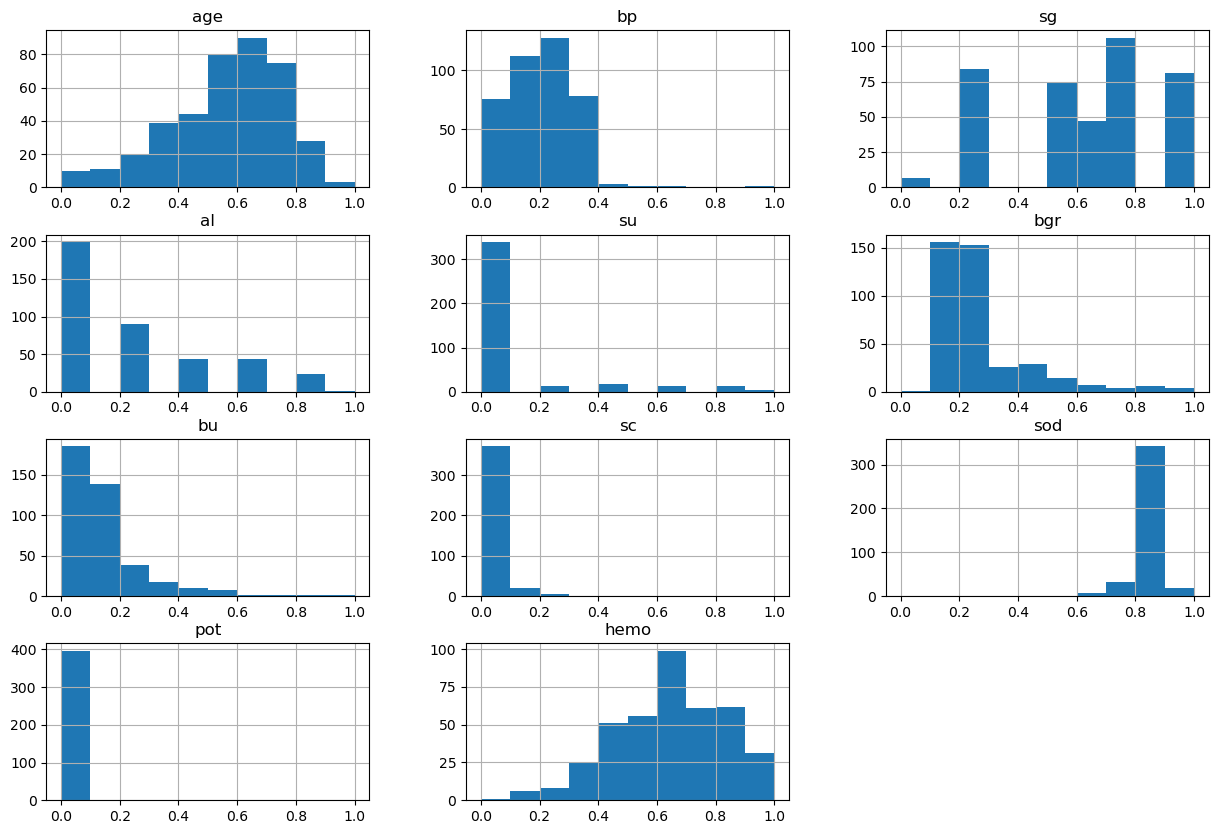

In [62]:
# We plot the distributions and check the scales
X_scaled.hist(figsize=(15,10))
plt.show()

### Handling categorical data
These are transformers that are not intended to be used on features, only on supervised learning targets. For example, categorical data is not mathematically represented in the dataset. 

To handle this situation, scikit-learn provides the function `LabelEncoder`, which is a utility class to help normalize labels from categorical features. It will replace the classes with integers that represent each class. In R, this is also known as *factors.* `LabelEncoder` can be used as follows:

In [65]:
# We create the `LabelEncoder`
le = preprocessing.LabelEncoder()

In [66]:
# Create a toy example. First, we will encode the classes and detect the unique classes
le.fit(["low", "medium", "high", "medium"])
list(le.classes_)

['high', 'low', 'medium']

In [67]:
# Based on this Encoder, we took the vector of categorical data and transform it to numeric data
le.transform(["low", "low", "high"])

array([1, 1, 0])

In [68]:
# We can decode a vector of numeric values to obtain the original classes
list(le.inverse_transform([1, 1, 0]))

['low', 'low', 'high']

Now, let's get back to our dataset. We need to transform the categorical features and encode them:

In [69]:
categorical_columns

['ba',
 'htn',
 'appet',
 'pc',
 'pe',
 'ane',
 'rc',
 'pcv',
 'pcc',
 'rbc',
 'wc',
 'dm',
 'cad']

### Exercise
Since we have 13 categorical features, we will create a Python loop and save the encoders in a dictionary. You will have to create inside of the loop the Encoder and transform the dataset.

In [71]:
# Create a dictionary of encoders
encoders = {}

# Run the loop
for column in categorical_columns:
    # Create the LabelEncoder
    le = preprocessing.LabelEncoder()
    
    # Train the LabelEncoder using the X[column] 
    le.fit(X_scaled[column])
    
    # Replace the X_scale[column] with the transformed data
    X_scaled[column] = le.transform(X_scaled[column])
    
    # Append the Encoder to the dictionary
    encoders[column] = le

In [72]:
# Check the dictionary of encoders
encoders

{'ba': LabelEncoder(),
 'htn': LabelEncoder(),
 'appet': LabelEncoder(),
 'pc': LabelEncoder(),
 'pe': LabelEncoder(),
 'ane': LabelEncoder(),
 'rc': LabelEncoder(),
 'pcv': LabelEncoder(),
 'pcc': LabelEncoder(),
 'rbc': LabelEncoder(),
 'wc': LabelEncoder(),
 'dm': LabelEncoder(),
 'cad': LabelEncoder()}

In [73]:
# We check the columns, we will see that now all columns are numeric.
X_scaled.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc        int64
pc         int64
pcc        int64
ba         int64
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv        int64
wc         int64
rc         int64
htn        int64
dm         int64
cad        int64
appet      int64
pe         int64
ane        int64
dtype: object

In [74]:
# We can print the final dataframe
X_scaled

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
id,,,,,,,,,,,,,,,,,,,,,
0,0.522727,0.230769,0.75,0.2,0.0,1,1,0,0,0.211538,...,0.836735,32,72,34,1,4,1,0,0,0
1,0.056818,0.000000,0.75,0.8,0.0,1,1,0,0,0.269309,...,0.557823,26,56,34,0,3,1,0,0,0
2,0.681818,0.230769,0.25,0.4,0.6,1,1,0,0,0.856838,...,0.442177,19,70,34,0,4,1,1,0,1
3,0.522727,0.153846,0.00,0.8,0.0,1,0,1,0,0.202991,...,0.551020,20,62,19,1,3,1,1,1,1
4,0.556818,0.230769,0.25,0.4,0.0,1,1,0,0,0.179487,...,0.578231,23,68,27,0,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.602273,0.230769,0.75,0.0,0.0,1,1,0,0,0.252137,...,0.857143,35,62,30,0,3,1,0,0,0
396,0.454545,0.153846,1.00,0.0,0.0,1,1,0,0,0.113248,...,0.911565,42,72,44,0,3,1,0,0,0
397,0.113636,0.230769,0.75,0.0,0.0,1,1,0,0,0.166667,...,0.863946,37,61,36,0,3,1,0,0,0


## 5. Create training and testing datasets
We split our dataset into two portions: training dataset and testing dataset. We will use the former to train the predictive model, and the latter to evaluate the model's accuracy. To split the data, we use `train_test_split` function provided by scikit-learn library. There are four parameters of this function
* The imput data (X_scaled)
* The target vector (y)
* `test_size`: The dataset's percentage that will be used for testing. We will use `0.20`.
* `random_state`: Random seed. We can keep it fixed so we can reproduce the random numbers across multiple calls. We will use [42](https://hitchhikers.fandom.com/wiki/42). 

### Excercise
Create the training and testing datasets. Remember that this method returns 4 variables (`X_train`, `X_test`, `y_train`, `y_test`). You can check the function's [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to check how the parameters are set up.

In [ ]:
# Create here the training and testing datasets using train_test_split
X_train, X_test, y_train, y_test = train_test_split

In [ ]:
# We print the training dataset. We will have 320 observations.
X_train

In [ ]:
# Check the testing dataset. We will have 80 observations
# X_test

## 6. Train a neural network with the training dataset

For this exercise, we will create a neural network called Multi-layer perceptron (MLP). The model learns from the dataset through three types of layers:
* *The input layer*: The input layer receives the features to be processed.
* *The output layer*: The prediction and classification is performed by the output layer.
* *The hidden layers*: An arbitrary number of hidden layers that are placed in between the input and output layer perform the computation. Each layer has nodes (also known as neurons) that transforms the values from the previous layer into an activation funcition. The output layer receives the activated values from the last hidden layer and transforms them into output values.

<img src="https://static.javatpoint.com/tutorial/tensorflow/images/multi-layer-perceptron-in-tensorflow.png" alt="drawing" width="400"/>

Multi-layer perceptrons are networks of nodes that pass a linear combination of their inputs from one layer to another. As they do this, the nodes decide how to modify their inputs, utilizing a given activation function. The activation function of a neuron is the key here. By selecting non-linear activation functions, the neural network can embed non-linearity in its operation:

<img src="https://www.baeldung.com/wp-content/uploads/sites/4/2020/06/Copy-of-Copy-of-Blank-Diagram1.svg" alt="drawing" width="400"/>

Neural networks are good for non-linear classes of problems. The first advantage of neural networks is, therefore, their flexibility in addressing problems with non-linear shapes. MLPs are implemented in diverse fields such as speech recognition, image recognition, and machine translation software. From artificial neural networks, **deep learning** has emerged as a sub-field of machine learning.

Let's create a simple perceptron with 5 nodes in two layers

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(5, 2), random_state=1,max_iter=1000)

### Exercise
Use the `fit` function to train the model. Remember that it has two parameters: `X_train` and `y_train`.
Then, use the `predict` to predict the values using `X_test`.

In [ ]:
# ...

In [ ]:
# Use the predict function to test the model
# y_predicted = ...

In [ ]:
# We create a dataframe with the real target and the predicted target
# y_train_df = pd.DataFrame({'y_real': y_test, 'y_predicted': y_predicted})
# y_train_df['difference'] = y_train_df.y_real == y_train_df.y_predicted 
# y_train_df

## 7. Evaluate the model with the testing dataset

In binary classiifcation problems, there are two main metrics:
* Precision: What proportion of positive identifications was actually correct?
* Recall: What proportion of actual positives was identified correctly?

Precision and recall are performance metrics that apply to data retrieved from a classification process. We can see the diferences here:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/700px-Precisionrecall.svg.png" width="400px">


To check the mathematical formulas, check [here](https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall).

In [ ]:
# We a text report showing the main classification metrics.
# print(classification_report(y_test, y_predicted))

In [ ]:
# We can print these numbers as the confusion matrix.
# plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)  
# plt.show()

### Exercise
Create a new model using 10 layers with 10 nodes each layer. Would the performance improve? 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)

In [ ]:
# Create the model, fit, and predict.
#clf = ....

In [ ]:
# print(classification_report(y_test, y_predicted))

In [ ]:
# plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)  
# plt.show()  

## What if...

### Using the raw data, removing the NaNs and only numerical values

In [ ]:
kidney_no_na = kidney_df.dropna()
X_no_na = kidney_no_na.drop(['classification'], axis=1)
y_no_na = kidney_no_na['classification'].astype(int)

In [ ]:
X_no_na

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_no_na[numeric_columns], y_no_na, test_size=0.20, random_state=42)

In [ ]:
clf = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1,max_iter=1000)
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predicted))

In [ ]:
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()  

### No categorical attributes and no rescale

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_imp[numeric_columns], y, test_size=0.20, random_state=42)

In [ ]:
clf = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1,max_iter=1000)
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predicted))

In [ ]:
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()  

### Scaled, but no categorical attributes

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled[numeric_columns], y, test_size=0.20, random_state=42)

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(5, 2), random_state=1, max_iter=1000)
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predicted))

In [ ]:
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()  

### Only categorical variables

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled[categorical_columns], y, test_size=0.20, random_state=42)

In [ ]:
clf = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1,max_iter=2000)
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predicted))

In [ ]:
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()  

## More to learn...
* How do we estimate the correct parameters to use?: [Hyperparameter optimization](https://scikit-learn.org/stable/modules/grid_search.html)
* How do evaluate the model? [Metrics and scoring](https://scikit-learn.org/stable/modules/model_evaluation.html)
* How can I train a model using different partitions of my dataset? [Corss-validation](https://scikit-learn.org/stable/modules/cross_validation.html)
* Neural Networks: [TensorFlow](https://www.tensorflow.org/)